## Chapter 5: Growth Analyses

Midap-tools supports growth analyses out of the box

We load a prepared experiment that has already added metadata and log transformed data. we also filter out any trackID that occurs in less than 5 frames

In [25]:
from fluid_experiment.fluid_experiment import FluidExperiment

PATH = "../../data/midap-tools_example/example_experiment.h5"
experiment = FluidExperiment.load(PATH)
experiment.filter_data(column="trackID", min_occurences=5)
print(experiment)


Successfully loaded experiment with data from 6 positions and 2 color channels
Filtering out trackID with less than 5 occurences
Filtering channel CFP at position pos1:
Filtering channel YFP at position pos1:
Filtering channel CFP at position pos2:
Filtering channel YFP at position pos2:
Filtering channel CFP at position pos3:
Filtering channel YFP at position pos3:
Filtering channel CFP at position pos4:
Filtering channel YFP at position pos4:
Filtering channel CFP at position pos5:
Filtering channel YFP at position pos5:
Filtering channel CFP at position pos6:
Filtering channel YFP at position pos6:
FluidExperiment with name: example_experiment
Path: ../../data/midap-tools_example
6 positions: pos1, pos2, pos3, pos4, pos5, pos6
2 color channels: CFP, YFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, area, area_log, density_CFP, density_YFP, edges_max_col, edges_max_row, edges_min_col, edges_min_row, first_frame, frame, globalID, intensity_max,

## Perform a growth analysis

To perform a growth analysis we use the following command

In [ ]:
experiment.calculate_growth_rate(integration_window=5,id_column="trackID",value_column="major_axis_length_log")
print(experiment)

Calculate growth rate for trackID measured with major_axis_length_log over an integration window of 5
FluidExperiment with name: example_experiment
Path: ../../data/midap-tools_example
6 positions: pos1, pos2, pos3, pos4, pos5, pos6
2 color channels: CFP, YFP
length of experiment is consistent: 143
experiment has consistent headers: Unnamed: 0, area, area_log, density_CFP, density_YFP, edges_max_col, edges_max_row, edges_min_col, edges_min_row, first_frame, frame, globalID, intensity_max, intensity_mean, intensity_min, labelID, last_frame, lineageID, major_axis_length, major_axis_length_log, minor_axis_length, split, trackID, trackID_d1, trackID_d2, trackID_mother, x, y, my_custom_growth_name
Experiment has metadata:
          device_channel          experiment   group position
position                                                     
pos1                   1  example_experiment  Group1     pos1
pos2                   2  example_experiment  Group1     pos2
pos3                   3 

***

As we note, the operation added a new column `growth_rate` to the experiment. The method that is used by default first calculates the delta growth rate between any two frames for each cell (identified by "trackID" in this case) and then calculates the average of this rate across the next N frames (defined by the integration_window)

**Tip**: we can also specify the name of the new column by defining the `growth_rate_column` argument:  
`experiment.calculate_growth_rate(integration_window=5,id_column="trackID",value_column="major_axis_length_log",growth_rate_column="my_custom_growth_name")`

## Plot growth analysis results

To visualize the growth rate over time we can use: 

In [27]:
experiment.plot_rates(positions="pos1")

KeyError: 'Column not found: growth_rate'

<Figure size 1000x500 with 0 Axes>

***

we can also plot data aggregated by groups

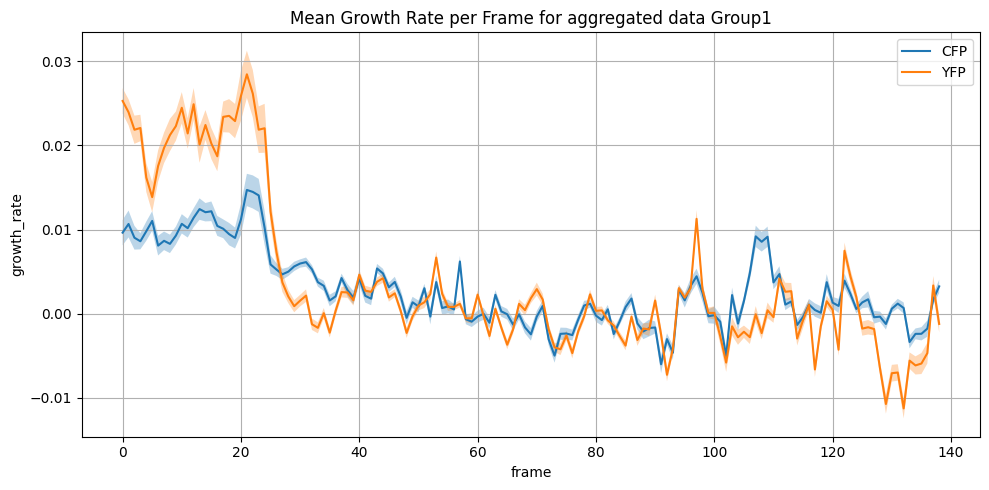

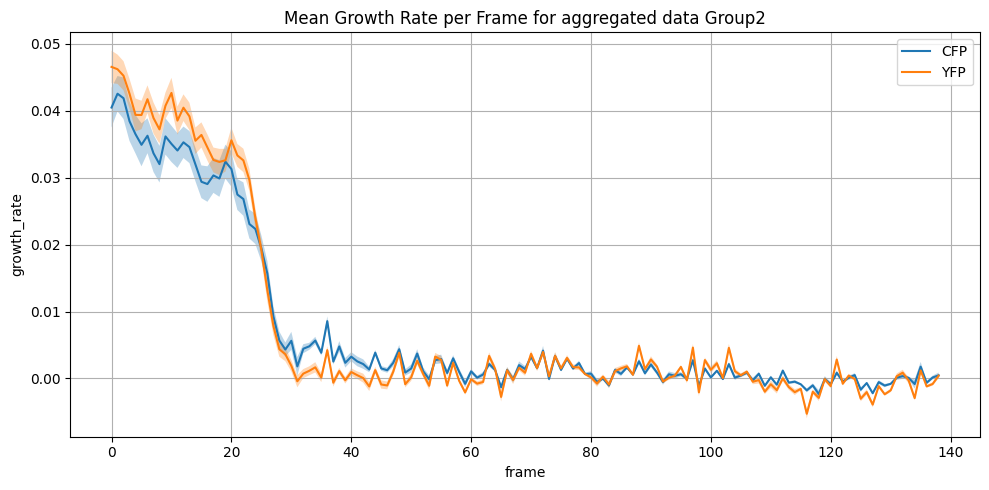

In [ ]:
experiment.plot_rates(group_by="group")

we may wish to show all groups on one single plot, instead of both channels

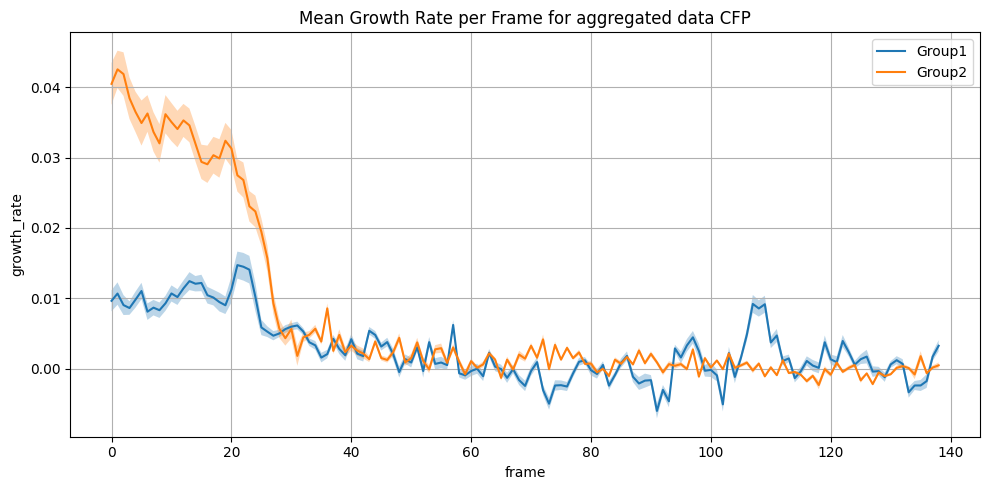

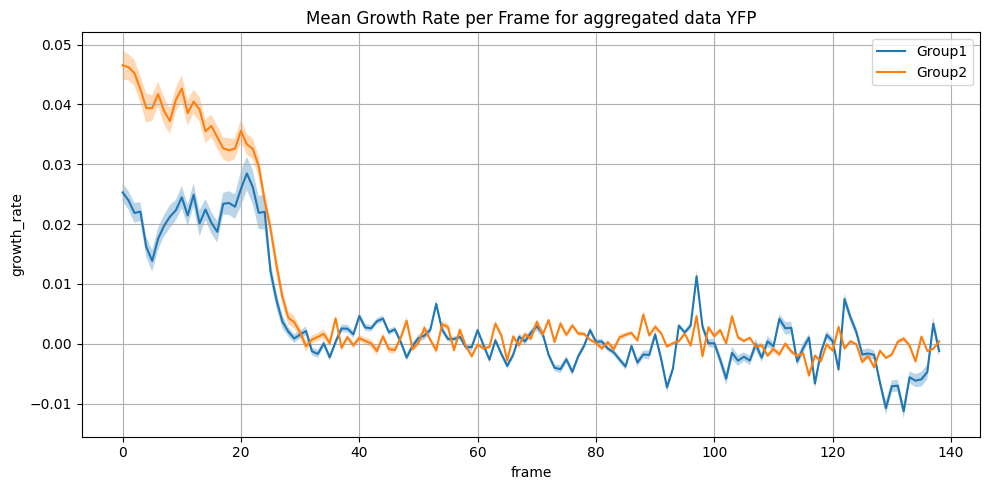

In [ ]:
experiment.plot_rates(group_by="group", flip_grouping=True)

***

we may want to plot by a different x axis instead of frame

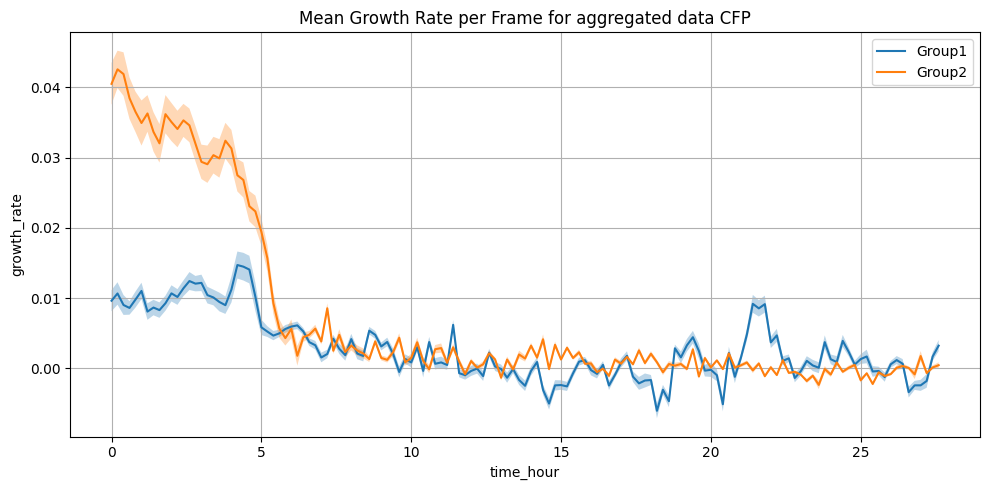

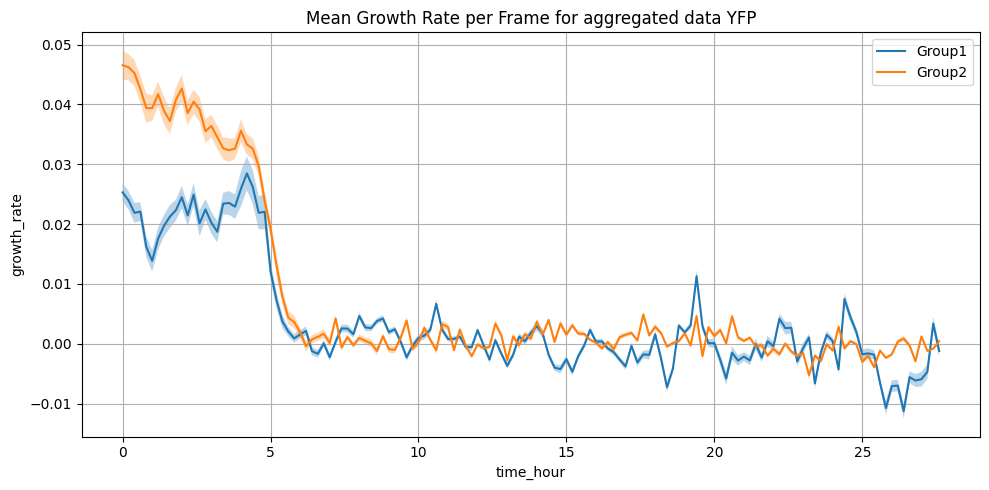

In [ ]:
factor = 5
def rescale_time(x):
    return x / factor

experiment.calculate_transform_data(column = "frame", postfix="_rescaled",custom_function=rescale_time)
experiment.rename_data_column("frame_rescaled","time_hour")

experiment.plot_rates(group_by="group", flip_grouping=True, frame_column="time_hour")

***

**Tip**: We can use any other column as x axis here. lets plot major axis length over time for this example. In addition we can set a custom title

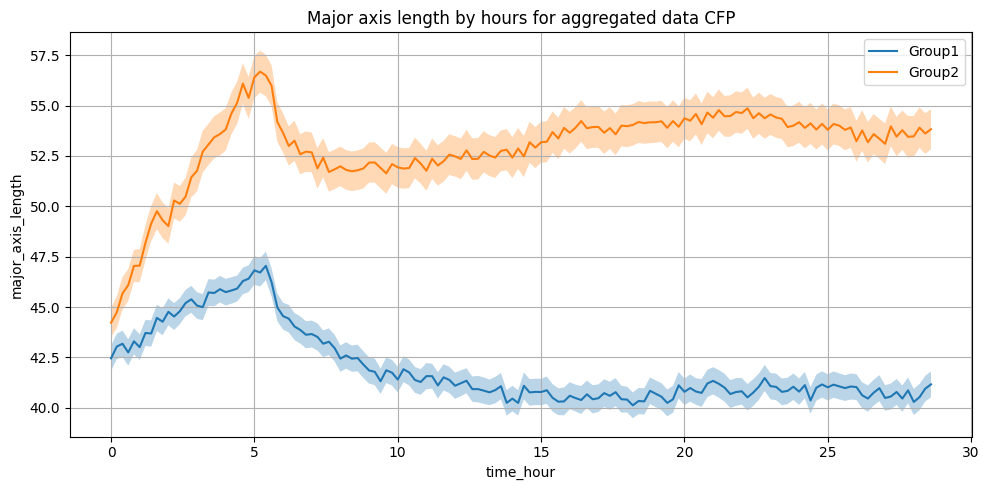

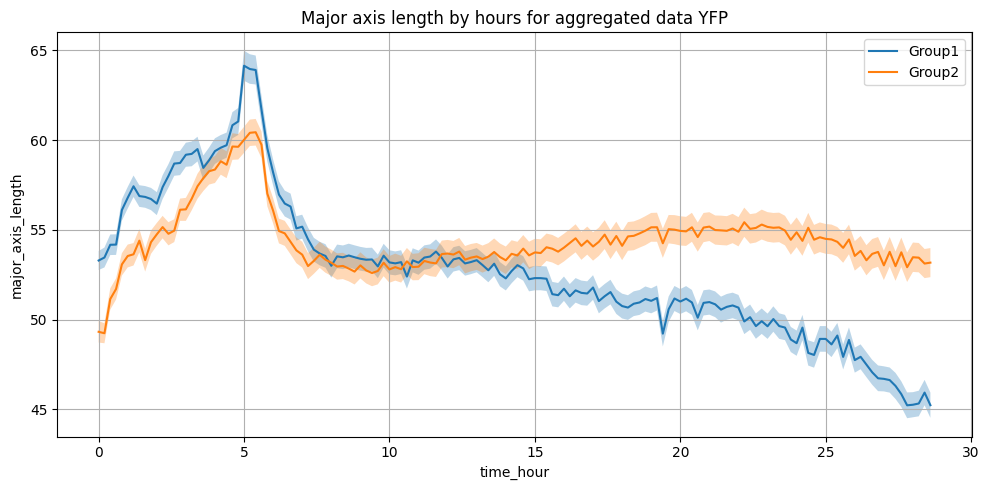

In [ ]:
experiment.plot_rates("major_axis_length",group_by="group",flip_grouping=True, frame_column="time_hour", title="Major axis length by hours")

## Add time bins

we may also want to define time bins, by which we can separate data
to do this we can do:

In [ ]:
bin_data = {"bin_1": range(0,20),
            "bin_2": range (20,30),
            "bin_3": range(30,140)}
    

experiment.add_bin_data(bin_data)


Adding bin data to all positions and color channels
Adding bin data to position pos1 and color channel CFP
Adding bin data to position pos1 and color channel YFP
Adding bin data to position pos2 and color channel CFP
Adding bin data to position pos2 and color channel YFP
Adding bin data to position pos3 and color channel CFP
Adding bin data to position pos3 and color channel YFP
Adding bin data to position pos4 and color channel CFP
Adding bin data to position pos4 and color channel YFP
Adding bin data to position pos5 and color channel CFP
Adding bin data to position pos5 and color channel YFP
Adding bin data to position pos6 and color channel CFP
Adding bin data to position pos6 and color channel YFP


## Create summary plots and reports

we can now use this bin data to create boxplot by bins and groups using:

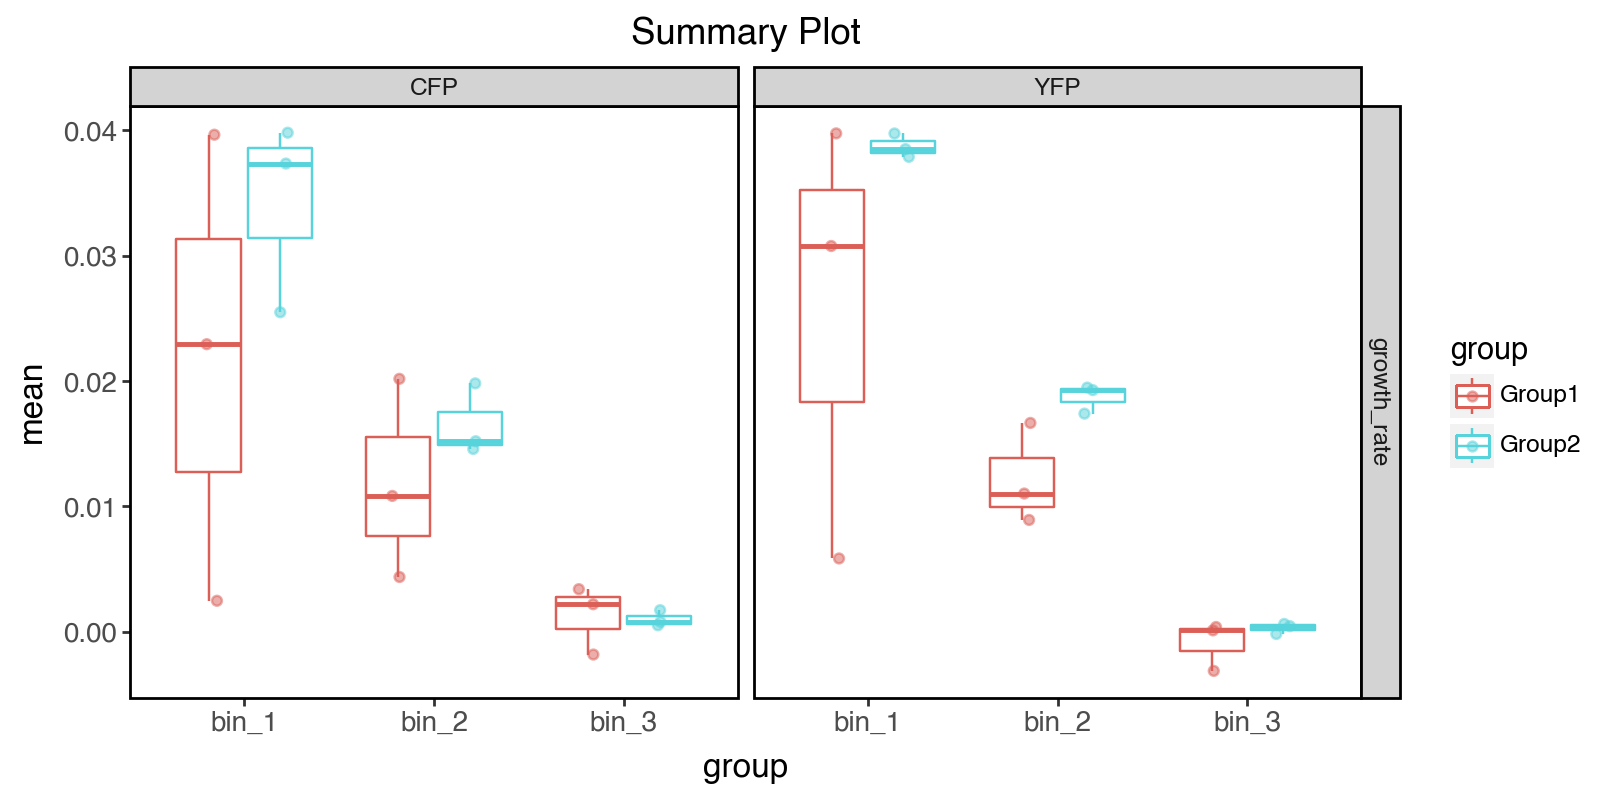

In [ ]:
experiment.plot_data_summary("growth_rate",use_bins=True,group_by="group")

we can also export the report data (i.e aggregated means by bins and groups) for followup statistics using

In [28]:
results = experiment.report_data_summary(value_column="growth_rate",use_bins=True)
print(results)

Column 'growth_rate' not found in data of position 'pos1' in color channel 'CFP'.
Column 'growth_rate' not found in data of position 'pos1' in color channel 'YFP'.
Column 'growth_rate' not found in data of position 'pos2' in color channel 'CFP'.
Column 'growth_rate' not found in data of position 'pos2' in color channel 'YFP'.
Column 'growth_rate' not found in data of position 'pos3' in color channel 'CFP'.
Column 'growth_rate' not found in data of position 'pos3' in color channel 'YFP'.
Column 'growth_rate' not found in data of position 'pos4' in color channel 'CFP'.
Column 'growth_rate' not found in data of position 'pos4' in color channel 'YFP'.
Column 'growth_rate' not found in data of position 'pos5' in color channel 'CFP'.
Column 'growth_rate' not found in data of position 'pos5' in color channel 'YFP'.
Column 'growth_rate' not found in data of position 'pos6' in color channel 'CFP'.
Column 'growth_rate' not found in data of position 'pos6' in color channel 'YFP'.
Empty DataFrame
